In [286]:
import pandas as pd
import numpy as np 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import matplotlib.pyplot

In [271]:
#Import the needed datas
#Read the datas
movies = pd.read_csv('titles.csv')
act_on_movies = pd.read_pickle('act_on_movies.pkl')

In [272]:
title_full = movies.merge(act_on_movies, how = 'left', on = 'tconst')
title_full.drop(columns = ['endYear'], inplace=True)
title_full_noNaN = title_full.dropna()
title_full_noNaN.reset_index(inplace = True)

In [273]:
title_full_noNaN['genres']

0                            Romance
1                                 \N
2         Action,Adventure,Biography
3                              Drama
4                              Drama
                     ...            
294898                 Drama,History
294899         Adventure,History,War
294900                        Comedy
294901                         Drama
294902                            \N
Name: genres, Length: 294903, dtype: object

In [274]:
#Get a list of genres per movie
title_full_noNaN= title_full_noNaN[title_full_noNaN['genres'] != '\\N']
title_full_noNaN['genres'] = title_full_noNaN['genres'].apply(lambda x : x.split(','))

#title_full_noNaN['genres'] = title_full_noNaN['genres'].apply(lambda x : "[]" if x == '\\N' else x)\
 #   .apply(lambda x : x.split(','))

In [275]:
#Get the median
med_tvMovie = title_full_noNaN['runtimeMinutes'][(title_full_noNaN['titleType']=='tvMovie') & (title_full_noNaN['runtimeMinutes']!='\\N')].median()
med_movie = title_full_noNaN['runtimeMinutes'][(title_full_noNaN['titleType']=='movie') & (title_full_noNaN['runtimeMinutes']!='\\N')].median()

#Replace the missing values
title_full_noNaN['runtimeMinutes'][(title_full_noNaN['titleType']=='movie') & (title_full_noNaN['runtimeMinutes']=='\\N')]=med_movie
title_full_noNaN['runtimeMinutes'][(title_full_noNaN['titleType']=='tvMovie') & (title_full_noNaN['runtimeMinutes']=='\\N')]=med_tvMovie

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21948\2582152373.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_full_noNaN['runtimeMinutes'][(title_full_noNaN['titleType']=='movie') & (title_full_noNaN['runtimeMinutes']=='\\N')]=med_movie
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21948\2582152373.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_full_noNaN['runtimeMinutes'][(title_full_noNaN['titleType']=='tvMovie') & (title_full_noNaN['runtimeMinutes']=='\\N')]=med_tvMovie


In [276]:
df.drop_duplicates(subset = df[['originalTitle' ,'primaryTitle', 'startYear']], inplace = True)

In [277]:
df = df[df['titleType']=='movie']
df['runtimeMinutes'] = df['runtimeMinutes'].apply(int)
df = df[df['runtimeMinutes']>60]
df = df[df['numVotes']>500]

In [278]:
s = df['genres']
df = pd.concat([df , pd.get_dummies(s.explode()).groupby(level=0).sum()], 
          axis = 1)

In [279]:
#isAdult, averageRating, runtimeMinutes, (Year?), genres (get_dummies)
columns_of_interest = ['isAdult', 'runtimeMinutes', 'averageRating'] + list(df.iloc[:, -26:].columns)
X= df[columns_of_interest]
distanceKNN = NearestNeighbors(n_neighbors = 6).fit(X)
title = df['originalTitle'][294897]
coord = distanceKNN.kneighbors(df.loc[df['originalTitle']==title, columns_of_interest])

In [280]:
for i in range(1, 6):
    print('You entered :', title, ', so we recommand :', 'TOP', i, ':' , df['originalTitle'].iloc[coord[1][0][i]])

You entered : Il talento del calabrone , so we recommand : TOP 1 : Cutterhead
You entered : Il talento del calabrone , so we recommand : TOP 2 : Lakewood
You entered : Il talento del calabrone , so we recommand : TOP 3 : Palimpsest
You entered : Il talento del calabrone , so we recommand : TOP 4 : Event 15
You entered : Il talento del calabrone , so we recommand : TOP 5 : The Bride He Bought Online


In [281]:
# Problems : 1 - Ratings in recommandation system, 
# 2 - Streamlit search bar very slow to load all these things, 
# 3 - What weight to give to every columns in the algorithm (most important : Genres ?) - Standardize 

Index(['index', 'Unnamed: 0', 'tconst', 'titleType', 'primaryTitle',
       'originalTitle', 'isAdult', 'startYear', 'runtimeMinutes', 'genres',
       'averageRating', 'numVotes', 'directors', 'nconst', 'primaryName',
       'Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Sport', 'Talk-Show', 'Thriller',
       'War', 'Western', 'Action', 'Adult', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western', 'Action', 'Adult', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror

In [283]:
df.to_csv('test_over500.csv')

In [285]:
df

,index,Unnamed: 0,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
2,3,3,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,70,"[Action, Adventure, Biography]",...,0,0,0,0,0,0,0,0,0,0
45,126,126,tt0002101,movie,Cleopatra,Cleopatra,0,1912,100,"[Drama, History]",...,0,0,0,0,0,0,0,0,0,0
46,132,132,tt0002130,movie,Dante's Inferno,L'Inferno,0,1911,71,"[Adventure, Drama, Fantasy]",...,0,0,0,0,0,0,0,0,0,0
56,168,168,tt0002423,movie,Passion,Madame DuBarry,0,1919,85,"[Biography, Drama, Romance]",...,0,0,0,0,1,0,0,0,0,0
88,268,268,tt0003014,movie,Ingeborg Holm,Ingeborg Holm,0,1913,96,[Drama],...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294868,784939,784939,tt9907782,movie,The Cursed,Eight for Silver,0,2021,111,"[Fantasy, Horror, Mystery]",...,0,1,0,0,0,0,0,0,0,0
294870,784942,784942,tt9908390,movie,Le lion,Le lion,0,2020,95,[Comedy],...,0,0,0,0,0,0,0,0,0,0
294880,785048,785048,tt9911196,movie,The Marriage Escape,De beentjes van Sint-Hildegard,0,2020,103,"[Comedy, Drama]",...,0,0,0,0,0,0,0,0,0,0
294897,785142,785142,tt9916270,movie,Il talento del calabrone,Il talento del calabrone,0,2020,84,[Thriller],...,0,0,0,0,0,0,0,1,0,0


<Axes: >

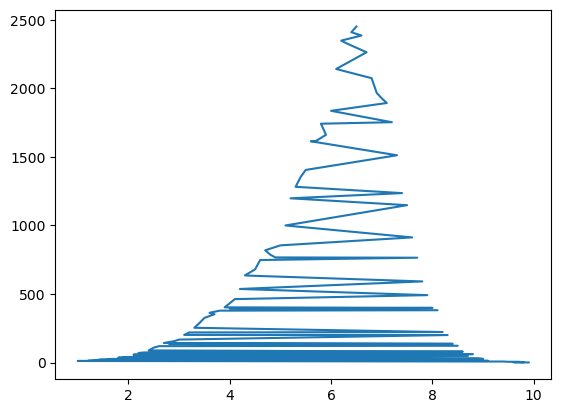

In [267]:
df['averageRating'].value_counts().plot()

<Axes: xlabel='startYear', ylabel='Count'>

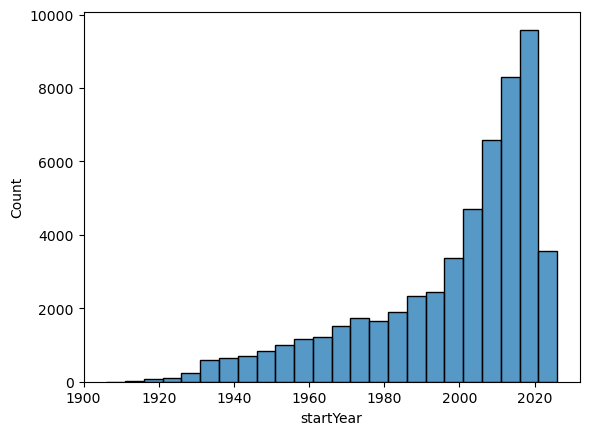

In [299]:
# The years of the movies present in our database 
sns.histplot(data = df['startYear'][df['startYear']!='\\N'].apply(lambda x : int(x)), binwidth = 5)

In [300]:
df.columns

Index(['index', 'Unnamed: 0', 'tconst', 'titleType', 'primaryTitle',
       'originalTitle', 'isAdult', 'startYear', 'runtimeMinutes', 'genres',
       'averageRating', 'numVotes', 'directors', 'nconst', 'primaryName',
       'Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Sport', 'Talk-Show', 'Thriller',
       'War', 'Western', 'Action', 'Adult', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western', 'Action', 'Adult', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror

In [ ]:
#The most represented genres

<Axes: xlabel='averageRating', ylabel='Count'>

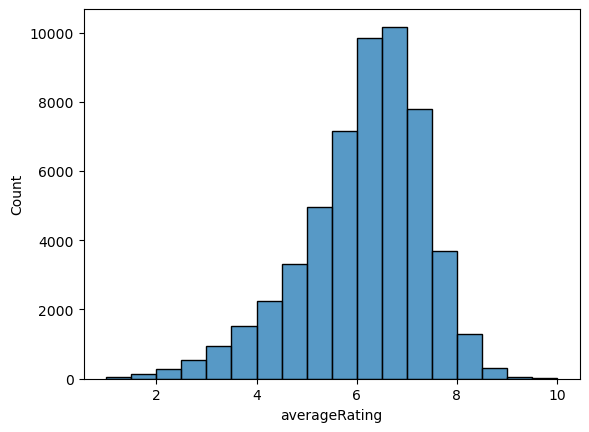

In [304]:
#The ratings 
sns.histplot(data = df, x = 'averageRating', binwidth = 0.5)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21948\774706991.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_per_year = df[['startYear', 'runtimeMinutes']][df['runtimeMinutes']!="\\N"].groupby(by = df['startYear']).mean()


<Axes: xlabel='startYear', ylabel='runtimeMinutes'>

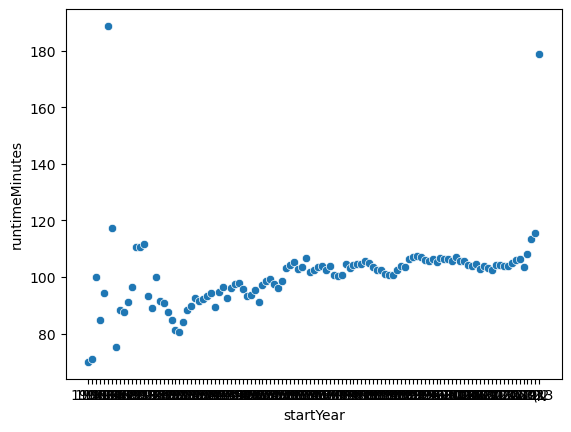

In [312]:
mean_per_year = df[['startYear', 'runtimeMinutes']][df['runtimeMinutes']!="\\N"].groupby(by = df['startYear']).mean()
sns.scatterplot(data = mean_per_year, x = 'startYear', y = 'runtimeMinutes')

In [316]:
columns_of_interest = ['startYear'] + list(df.iloc[:, -26:].columns)
mean_per_year_genres = df[columns_of_interest].groupby(by = df['startYear']).sum()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21948\2806987503.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_per_year_genres = df[columns_of_interest].groupby(by = df['startYear']).sum()


In [319]:
mean_per_year_genres = mean_per_year_genres.iloc[0:-1, :]
seaborn.lineplot(data = mean_per_year_genres, x = 'startYear'; y = 'Western')

,Western,Western,Western,Action,Action,Action,Adult,Adult,Adult,Adventure,...,Sport,Thriller,Thriller,Thriller,War,War,War,Western,Western,Western
startYear,,,,,,,,,,,,,,,,,,,,,
1906,0,0,0,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1911,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1912,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1913,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1914,0,0,0,2,2,2,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,14,14,14,400,400,400,0,0,0,202,...,34,376,376,376,42,42,42,14,14,14
2020,5,5,5,232,232,232,0,0,0,126,...,25,280,280,280,28,28,28,5,5,5
2021,7,7,7,331,331,331,0,0,0,151,...,34,354,354,354,18,18,18,7,7,7
